# Librerias

In [1]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os


In [2]:
import pickle
import sys
from pathlib import Path

# Añadir el directorio raíz del proyecto a sys.path
module_path = Path('/Users/Cesar/Desktop/Proyecto-CSG/').resolve()
if module_path not in sys.path:
    sys.path.append(str(module_path))

# Añadir el directorio que contiene 'new_spectral_metric' a sys.path
new_spectral_metric_path = module_path / '/Users/Cesar/Desktop/Proyecto-CSG/new_spectral_metric/'
if new_spectral_metric_path not in sys.path:
    sys.path.append(str(new_spectral_metric_path))

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from new_spectral_metric.new_estimator import CumulativeGradientEstimator
from new_spectral_metric.new_visualize import make_graph
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Lambda
from tensorflow.keras import backend as K
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
from pathlib import Path


# Lectura del dataset

In [3]:
# Lectura de dataset

directorio_dataset = ('../Datasets/CIFAR-10')
directorio_dataset = pathlib.Path(directorio_dataset)

# Lectura de la carpeta train
directorio_train = ('../Datasets/CIFAR-10/train')
directorio_train = pathlib.Path(directorio_train)

# Lectura de la carpeta test
directorio_test = ('../Datasets/CIFAR-10/test')
directorio_test = pathlib.Path(directorio_test)


total_dataset = len(list(directorio_dataset.glob('*/*/*.png')))  # Cuenta la cantidad de imagenes del dataset (Aqui busca en las subcarpetas del directorio del dataset)
total_train = len(list(directorio_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train
total_test = len(list(directorio_test.glob('*/*.png')))  # Cuenta la cantidad de imagenes de test

print(f"Total imagenes dataset: {total_dataset}")
print(f"Total imagenes train: {total_train}")
print(f"Total imagenes test: {total_test}")

Total imagenes dataset: 60000
Total imagenes train: 50000
Total imagenes test: 10000


In [4]:
# Dimensiones de imagen y tamaño de batch
img_height = 32
img_width = 32
#batch_size = 32
batch_size = total_train

In [5]:

# Data splitting (entrenamiento y validación)
all_images_in_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  #directorio_dataset,
  directorio_train,
  #directorio_test,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 50000 files belonging to 10 classes.


In [6]:
# Contar el total de imágenes por clase en train y test
class_counts_total = {p.name: len(list(p.glob('*.png'))) for p in directorio_dataset.glob('*/*')}
class_counts_train = {p.name: len(list(p.glob('*.png'))) for p in directorio_train.glob('*')}
class_counts_test = {p.name: len(list(p.glob('*.png'))) for p in directorio_test.glob('*')}




# Mostrar el total de imágenes por clase en train
print("\nTotal de imágenes por clase en train:")
for class_name, count in class_counts_train.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes train: {total_train}")

# Mostrar el total de imágenes por clase en test
print("\nTotal de imágenes por clase en test:")
for class_name, count in class_counts_test.items():
    print(f"Clase: {class_name}, Número de imágenes: {count}")
print(f"Total imagenes test: {total_test}")


Total de imágenes por clase en train:
Clase: airplane_train, Número de imágenes: 5000
Clase: automobile_train, Número de imágenes: 5000
Clase: bird_train, Número de imágenes: 5000
Clase: cat_train, Número de imágenes: 5000
Clase: deer_train, Número de imágenes: 5000
Clase: dog_train, Número de imágenes: 5000
Clase: frog_train, Número de imágenes: 5000
Clase: horse_train, Número de imágenes: 5000
Clase: ship_train, Número de imágenes: 5000
Clase: truck_train, Número de imágenes: 5000
Total imagenes train: 50000

Total de imágenes por clase en test:
Clase: airplane_test, Número de imágenes: 1000
Clase: automobile_test, Número de imágenes: 1000
Clase: bird_test, Número de imágenes: 1000
Clase: cat_test, Número de imágenes: 1000
Clase: deer_test, Número de imágenes: 1000
Clase: dog_test, Número de imágenes: 1000
Clase: frog_test, Número de imágenes: 1000
Clase: horse_test, Número de imágenes: 1000
Clase: ship_test, Número de imágenes: 1000
Clase: truck_test, Número de imágenes: 1000
Total

In [7]:
# Nombres de las clases
class_names_train = list(class_counts_train.keys())
class_names_test = list(class_counts_test.keys())
#class_names_total = sorted(list(set(class_names_train + class_names_test)))
class_names_total = list(class_counts_total.keys())

# Mostrar el número de clases y los nombres
print(f"\nNúmero de clases en train: {len(class_names_train)}")
print(f"Nombres de las clases en train: {class_names_train}")

print(f"\nNúmero de clases en test: {len(class_names_test)}")
print(f"Nombres de las clases en test: {class_names_test}")

print(f"\nNúmero total de clases en el dataset: {len(class_names_total)}")   # Este valor cambio si el nombre de las clases es diferente
print(f"Nombres de todas las clases en el dataset: {class_names_total}")     # Este valor tambien cambia si el nombre de las clases es diferente


Número de clases en train: 10
Nombres de las clases en train: ['airplane_train', 'automobile_train', 'bird_train', 'cat_train', 'deer_train', 'dog_train', 'frog_train', 'horse_train', 'ship_train', 'truck_train']

Número de clases en test: 10
Nombres de las clases en test: ['airplane_test', 'automobile_test', 'bird_test', 'cat_test', 'deer_test', 'dog_test', 'frog_test', 'horse_test', 'ship_test', 'truck_test']

Número total de clases en el dataset: 20
Nombres de todas las clases en el dataset: ['airplane_test', 'automobile_test', 'bird_test', 'cat_test', 'deer_test', 'dog_test', 'frog_test', 'horse_test', 'ship_test', 'truck_test', 'airplane_train', 'automobile_train', 'bird_train', 'cat_train', 'deer_train', 'dog_train', 'frog_train', 'horse_train', 'ship_train', 'truck_train']


In [8]:
# Revisar etiquetas de las imágenes
for images, labels in all_images_in_dataset:
    labels = labels.numpy() if hasattr(labels, 'numpy') else labels
    for label in labels:
        pass  # No se realiza ninguna acción con las etiquetas



In [9]:
for images, labels0 in all_images_in_dataset.take(1):  # only take first element of dataset
    numpy_all_images = images.numpy()  # convertir el tensor de imágenes en un arreglo de numpy y ahora contiene las imágenes del conjunto de datos en formato de numpy.
    numpy_all_labels = labels0.numpy()  # convierte el tensor de etiquetas en un arreglo de numpy y ahora contiene las etiquetas del conjunto de datos en formato de numpy

numpy_all_images /= 255.0  # Scale the features to the [0, 1] range
print(numpy_all_images.shape)

(50000, 32, 32, 3)


In [10]:
# Aplanar las imágenes
fully_dataset = numpy_all_images.reshape((numpy_all_images.shape[0], numpy_all_images.shape[1]*numpy_all_images.shape[2]*numpy_all_images.shape[3])) # es un arreglo bidimensional donde cada fila representa una imagen y cada columna representa un píxel de la imagen
fully_labels = numpy_all_labels.reshape(numpy_all_labels.shape[0],)

# Calcular y visualizar la complejidad del dataset (solo test)

In [11]:
# Inicializar el estimador
estimator = CumulativeGradientEstimator(M_sample=1000, k_nearest=10)
estimator.fit(data=fully_dataset, target=fully_labels)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

make_graph(estimator.difference, title="Dataset Complexity, CSG: "+str(csg), classes=class_names_test)

c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


# Calcular la similitud entre clases

In [ ]:
# Ordenar los pares de clases en orden de similitud ascendente (menos similar primero)
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))

# Filtrar pares para eliminar duplicados (i, j) y (j, i)
unique_pairs = [(clase_i, clase_j) for clase_i, clase_j in pairs if clase_i < clase_j]

# Asegúrate de que el índice de las clases no exceda la cantidad de clases en el dataset
filtered_pairs = [(clase_i, clase_j) for clase_i, clase_j in unique_pairs 
                  if clase_i < len(class_names_test) and clase_j < len(class_names_test)]

# Obtener los 10 pares de clases menos similares
top_10_least_similar_pairs = filtered_pairs[:10]

print("Cálculo de similitud entre clases")

# Crear una lista para almacenar la similitud de los 10 pares de clases
lst = []

for idx, (clase_i, clase_j) in enumerate(top_10_least_similar_pairs):
    lst.append({
        "Clases a comparar": f"{class_names_test[clase_i]} <> {class_names_test[clase_j]}", 
        "Similitud": estimator.W[clase_i, clase_j]
    })

# Mostrar la similitud en un DataFrame
print(pd.DataFrame(lst))

# Mostrar las dimensiones de la matriz de similitud
print(f"Dimensiones de la matriz W: {estimator.W.shape}")


Cálculo de similitud entre clases
            Clases a comparar  Similitud
0      frog_test <> ship_test   0.392600
1       dog_test <> ship_test   0.441800
2      deer_test <> ship_test   0.445200
3  airplane_test <> frog_test   0.454200
4       cat_test <> ship_test   0.467755
5      bird_test <> ship_test   0.502850
6   airplane_test <> dog_test   0.503400
7  airplane_test <> deer_test   0.506800
8     horse_test <> ship_test   0.515410
9     frog_test <> truck_test   0.521600
Dimensiones de la matriz W: (10, 10)


# Obtener el nombre de los archivos de train o test

In [ ]:
# Aca se obtiene el nombre de los archivos en train o test dependiendo de lo que se va a evaluar

# Obtener todos los nombres de archivo en train
filenames = [str(f) for f in directorio_train.glob('*/*.png')]

# Crear un mapeo de índices a nombres de archivo en train (solo el nombre de archivo, sin la ruta)
filenames_dict = {i: f for i, f in enumerate(directorio_train.glob('*/*.png'))}

# Calcular la similitud entre muestras


# 1. Visualizar las muestras (par de imagenes) menos similares entre la misma clase

Muestras menos similares entre las imágenes de la misma clase 

Clase: airplane_test
	Nombre del archivo: airbus_s_001253.png, Clase: airplane_test, Similitud: 0.1265
	Nombre del archivo: amphibious_aircraft_s_000449.png, Clase: airplane_test, Similitud: 0.1265


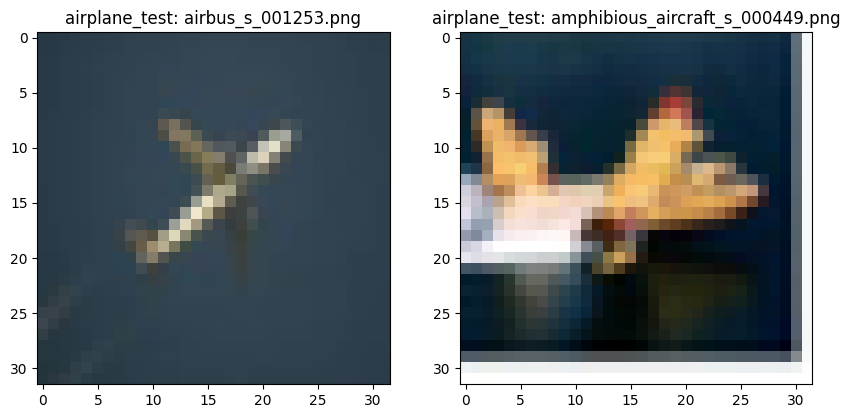

	Nombre del archivo: amphibious_aircraft_s_001305.png, Clase: airplane_test, Similitud: 0.3578
	Nombre del archivo: attack_aircraft_s_000133.png, Clase: airplane_test, Similitud: 0.3578


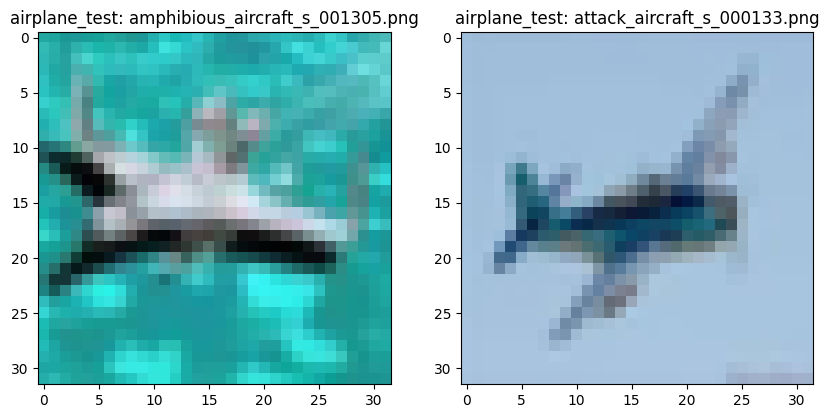

Clase: automobile_test
	Nombre del archivo: attack_aircraft_s_000566.png, Clase: automobile_test, Similitud: 0.2461
	Nombre del archivo: biplane_s_000862.png, Clase: automobile_test, Similitud: 0.2461


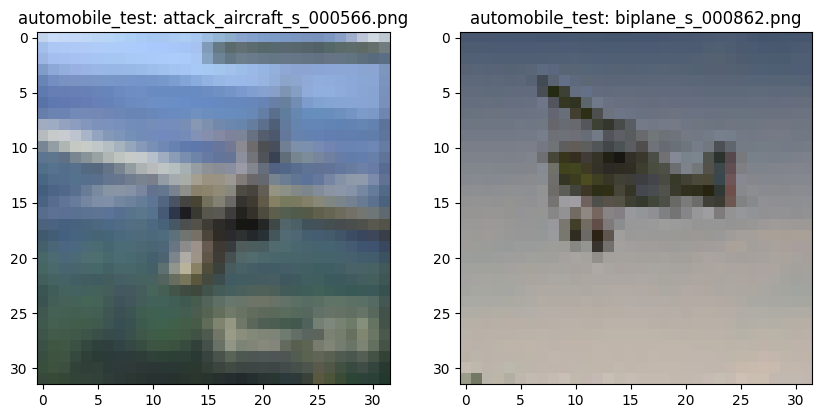

	Nombre del archivo: biplane_s_001135.png, Clase: automobile_test, Similitud: 0.2786
	Nombre del archivo: dive_bomber_s_001743.png, Clase: automobile_test, Similitud: 0.2786


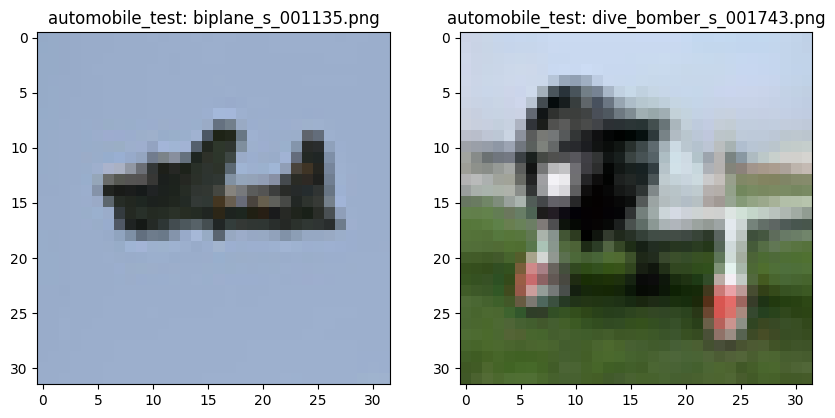

Clase: bird_test
	Nombre del archivo: fighter_aircraft_s_001789.png, Clase: bird_test, Similitud: 0.1563
	Nombre del archivo: floatplane_s_000295.png, Clase: bird_test, Similitud: 0.1563


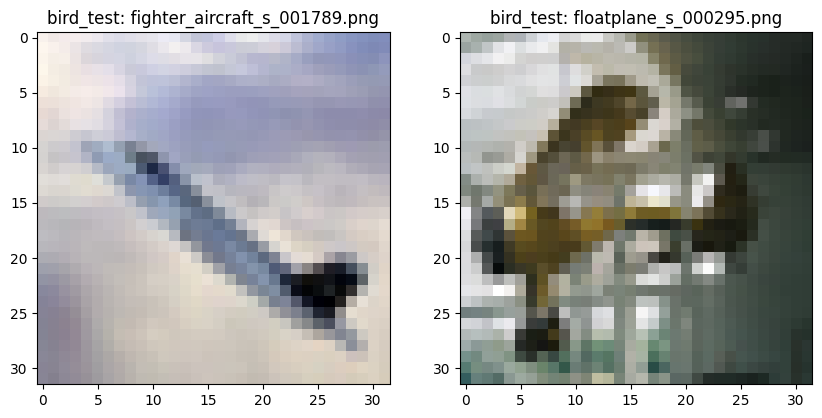

	Nombre del archivo: jetliner_s_001848.png, Clase: bird_test, Similitud: 0.1938
	Nombre del archivo: jetliner_s_000131.png, Clase: bird_test, Similitud: 0.1938


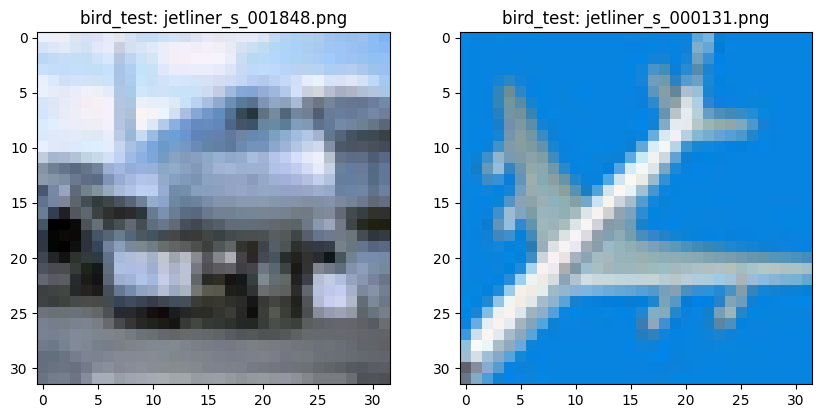

Clase: cat_test
	Nombre del archivo: monoplane_s_001543.png, Clase: cat_test, Similitud: 0.1216
	Nombre del archivo: reconnaissance_plane_s_001135.png, Clase: cat_test, Similitud: 0.1216


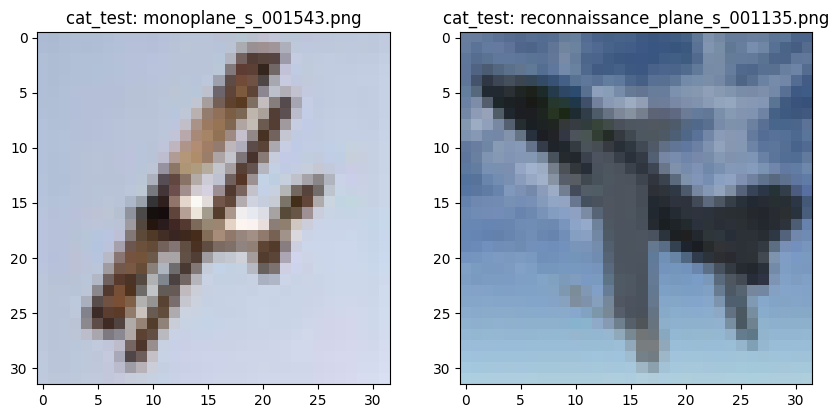

	Nombre del archivo: multiengine_airplane_s_000096.png, Clase: cat_test, Similitud: 0.1386
	Nombre del archivo: multiengine_airplane_s_000109.png, Clase: cat_test, Similitud: 0.1386


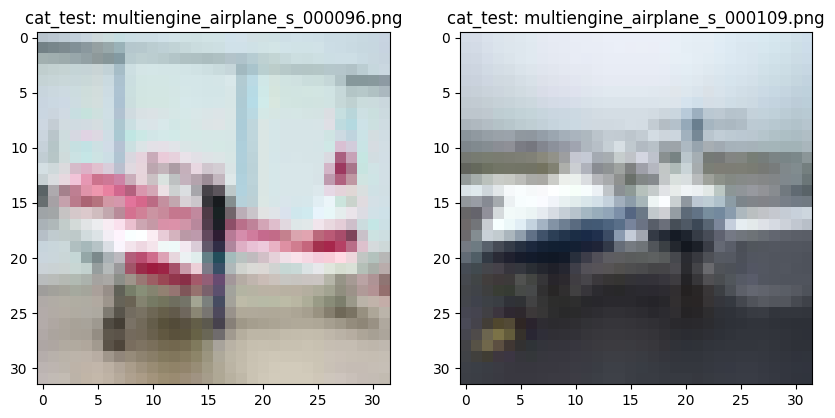

Clase: deer_test
	Nombre del archivo: twinjet_s_000207.png, Clase: deer_test, Similitud: 0.1548
	Nombre del archivo: stealth_bomber_s_002056.png, Clase: deer_test, Similitud: 0.1548


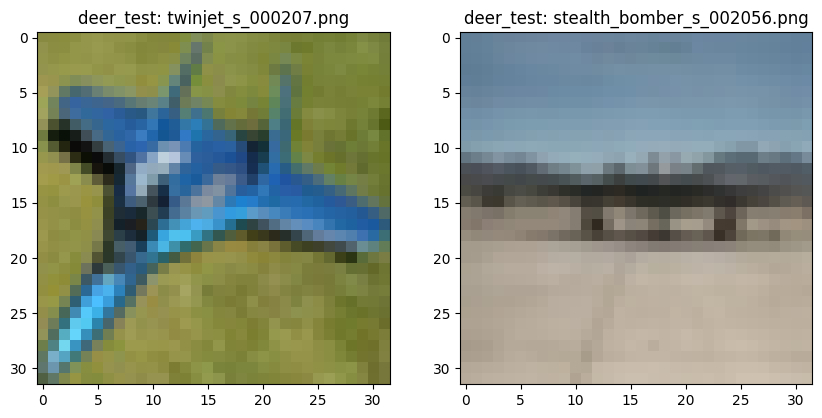

	Nombre del archivo: twinjet_s_000420.png, Clase: deer_test, Similitud: 0.1975
	Nombre del archivo: stealth_fighter_s_001880.png, Clase: deer_test, Similitud: 0.1975


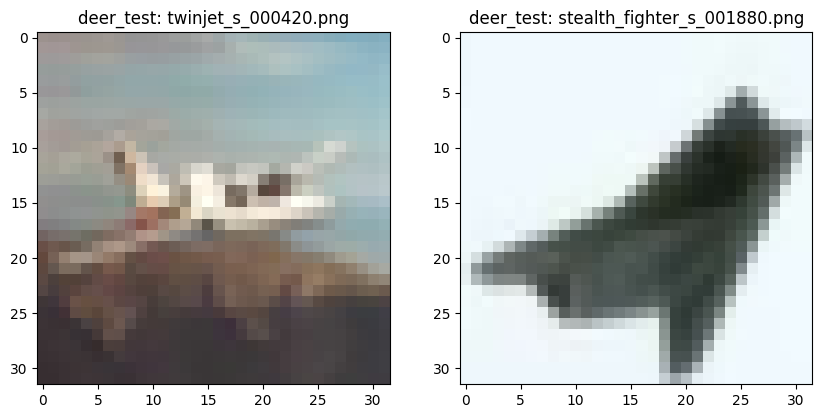

Clase: dog_test
	Nombre del archivo: automobile_s_000422.png, Clase: dog_test, Similitud: 0.1756
	Nombre del archivo: beach_wagon_s_000749.png, Clase: dog_test, Similitud: 0.1756


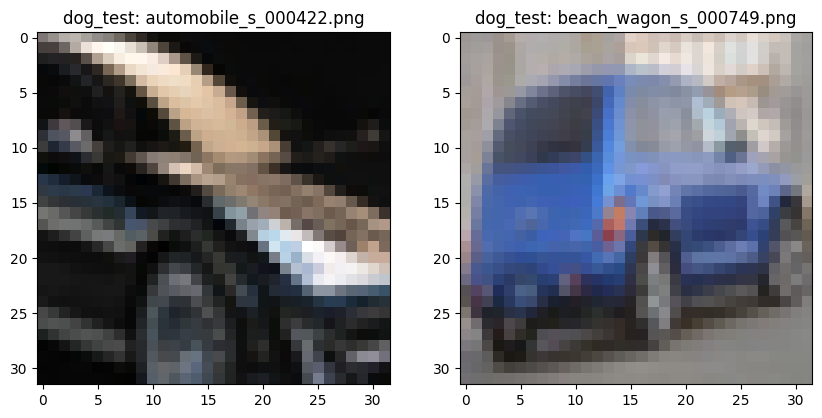

	Nombre del archivo: automobile_s_001891.png, Clase: dog_test, Similitud: 0.3030
	Nombre del archivo: automobile_s_002298.png, Clase: dog_test, Similitud: 0.3030


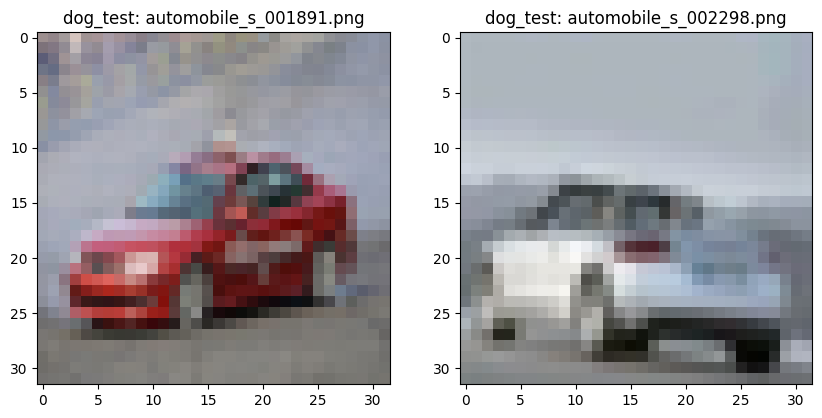

Clase: frog_test
	Nombre del archivo: car_s_001680.png, Clase: frog_test, Similitud: 0.2170
	Nombre del archivo: car_s_000240.png, Clase: frog_test, Similitud: 0.2170


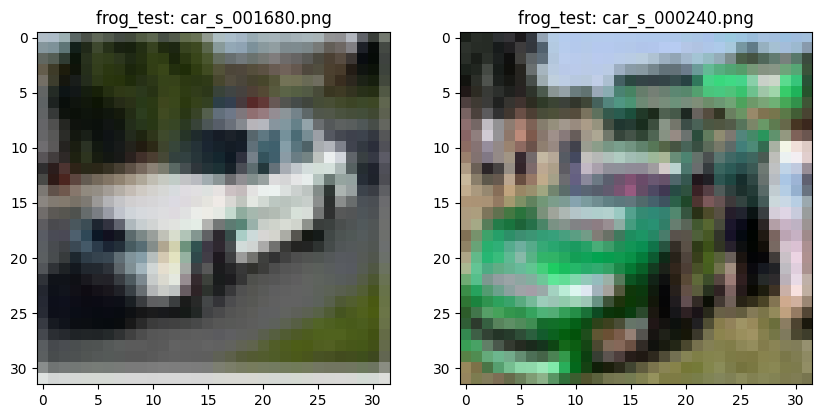

	Nombre del archivo: compact_car_s_001462.png, Clase: frog_test, Similitud: 0.2630
	Nombre del archivo: convertible_s_000043.png, Clase: frog_test, Similitud: 0.2630


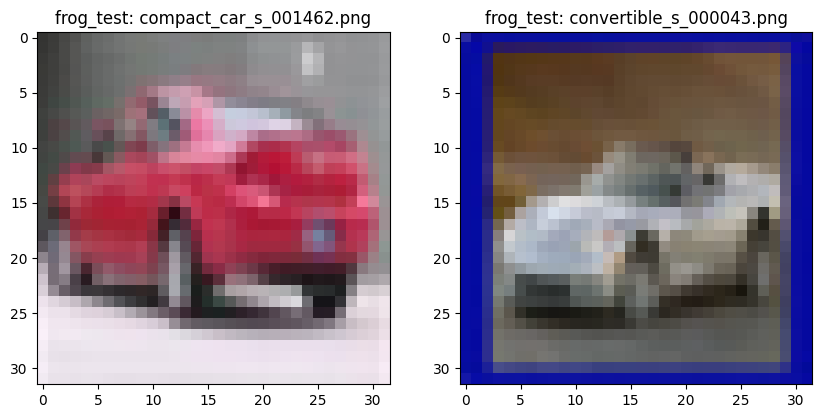

Clase: horse_test
	Nombre del archivo: coupe_s_000336.png, Clase: horse_test, Similitud: 0.1603
	Nombre del archivo: convertible_s_001526.png, Clase: horse_test, Similitud: 0.1603


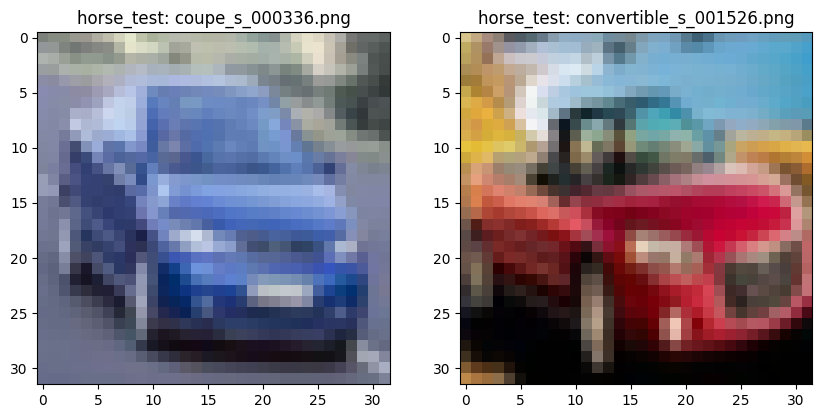

	Nombre del archivo: convertible_s_002316.png, Clase: horse_test, Similitud: 0.3105
	Nombre del archivo: coupe_s_000747.png, Clase: horse_test, Similitud: 0.3105


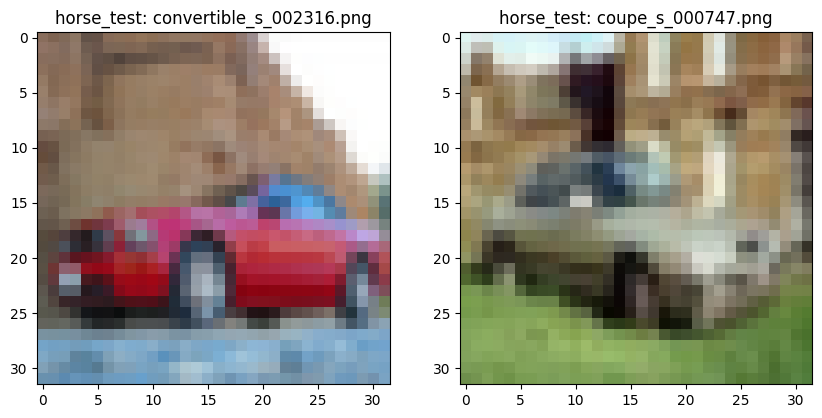

Clase: ship_test
	Nombre del archivo: cruiser_s_000818.png, Clase: ship_test, Similitud: 0.2186
	Nombre del archivo: estate_car_s_000005.png, Clase: ship_test, Similitud: 0.2186


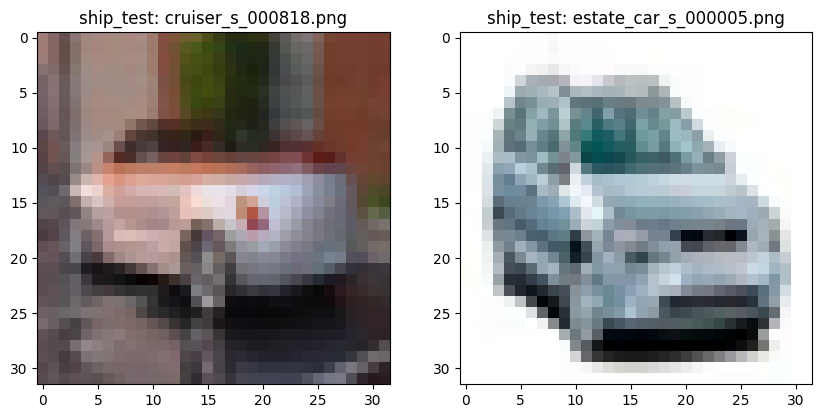

	Nombre del archivo: estate_car_s_001293.png, Clase: ship_test, Similitud: 0.3291
	Nombre del archivo: motorcar_s_002480.png, Clase: ship_test, Similitud: 0.3291


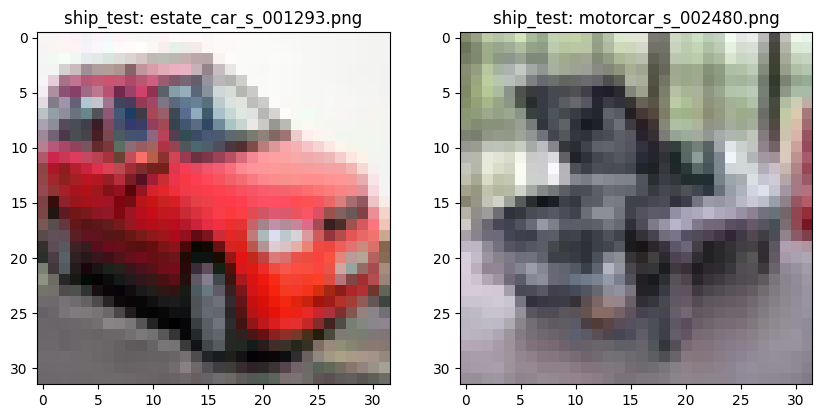

Clase: truck_test
	Nombre del archivo: wagon_s_001428.png, Clase: truck_test, Similitud: 0.1638
	Nombre del archivo: station_wagon_s_001888.png, Clase: truck_test, Similitud: 0.1638


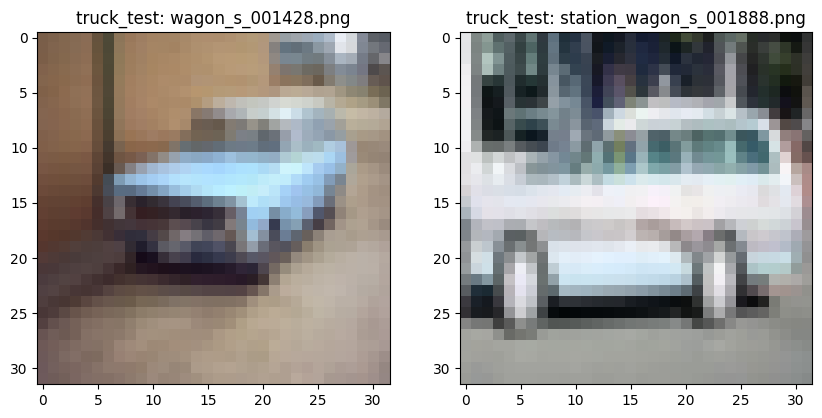

	Nombre del archivo: wagon_s_001546.png, Clase: truck_test, Similitud: 0.1947
	Nombre del archivo: station_wagon_s_001335.png, Clase: truck_test, Similitud: 0.1947


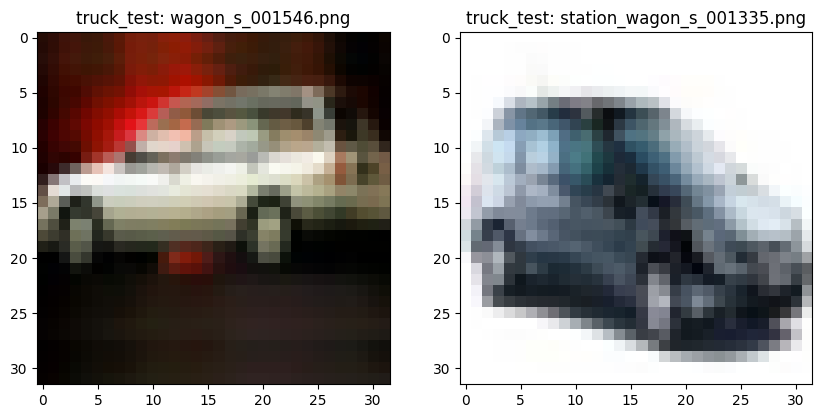

In [ ]:
# Función para visualizar las imágenes menos similares dentro de cada clase usando la matriz C
def show_least_similar_using_C_all_classes(estimator, class_names, filenames_dict):
    for class_intent in range(len(class_names)):
        print(f"Clase: {class_names[class_intent]}")
        
        # Obtener la matriz de similitud de las muestras dentro de la clase
        C = estimator.C[class_intent]
        
        # Ordenar los índices según las similitudes (de menor a mayor)
        least_similar_indices = np.argsort(C, axis=None)  # No usar [::-1], para menor a mayor
        
        # Conjunto para llevar un registro de los archivos ya mostrados
        shown_files = set()
        count = 0
        show_samples = 2  # Number of samples to visualize the similarity 
        
        for idx in least_similar_indices:
            if count >= show_samples:
                break
            
            # Convertir el índice plano a índice 2D
            idx_2d = np.unravel_index(idx, C.shape)
            
            # Saltar las comparaciones de una muestra consigo misma
            if idx_2d[0] == idx_2d[1]:
                continue
            
            # Obtener los índices de las muestras en el dataset
            source_idx = estimator.class_indices[class_intent][idx_2d[0]]
            target_idx = estimator.class_indices[class_intent][idx_2d[1]]
            
            # Verificar que los índices estén dentro de los límites del dataset
            if source_idx < len(filenames_dict) and target_idx < len(filenames_dict):
                source_filename = filenames_dict[int(source_idx)]
                target_filename = filenames_dict[int(target_idx)]
                
                if source_filename not in shown_files and target_filename not in shown_files:
                    shown_files.add(source_filename)
                    shown_files.add(target_filename)
                    
                    value = C[idx_2d]
                    print(f"\tNombre del archivo: {source_filename.name}, Clase: {class_names[class_intent]}, Similitud: {value:.4f}")
                    print(f"\tNombre del archivo: {target_filename.name}, Clase: {class_names[class_intent]}, Similitud: {value:.4f}")
                    
                    img_source = plt.imread(source_filename)
                    img_target = plt.imread(target_filename)
                    
                    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
                    axs[0].imshow(img_source)
                    axs[0].set_title(f"{class_names[class_intent]}: {source_filename.name}")
                    axs[1].imshow(img_target)
                    axs[1].set_title(f"{class_names[class_intent]}: {target_filename.name}")
                    plt.show()
                    
                    count += 1

print("Muestras menos similares entre las imágenes de la misma clase \n")
show_least_similar_using_C_all_classes(estimator, class_names_train, filenames_dict)


# 2. Visualizar las muestras (par de imagenes) menos similares entre las clases pares

Muestras menos similares entre las clases pares:
frog_train <> ship_train
Similitud: 0.3926


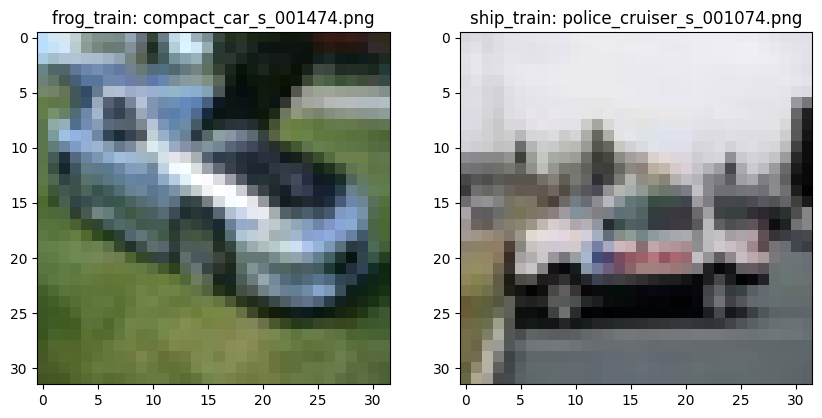

dog_train <> ship_train
Similitud: 0.4418


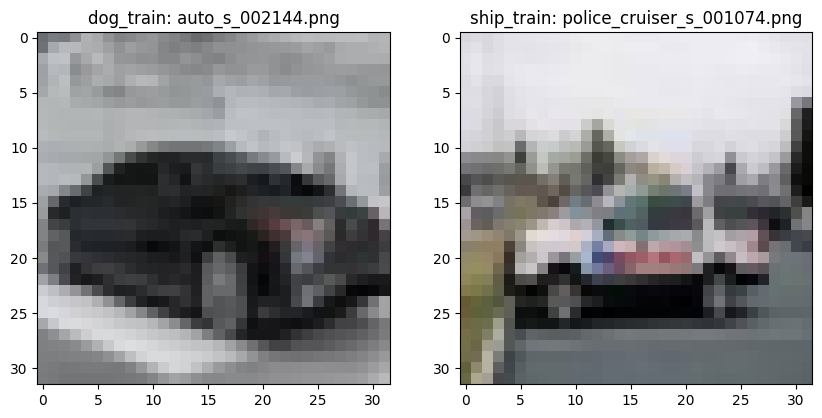

deer_train <> ship_train
Similitud: 0.4452


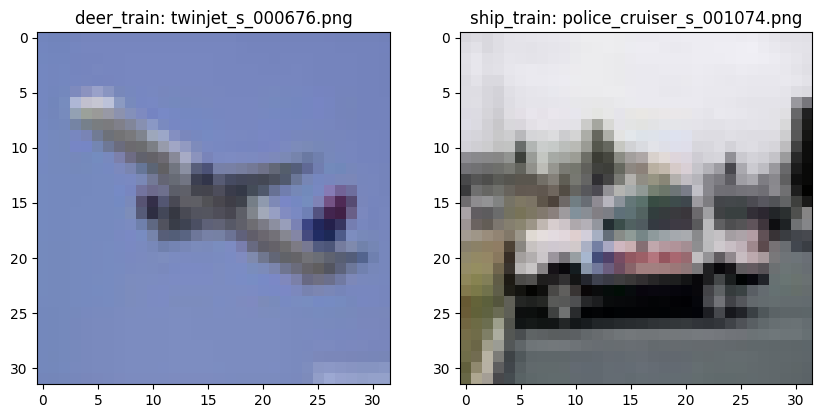

airplane_train <> frog_train
Similitud: 0.4542


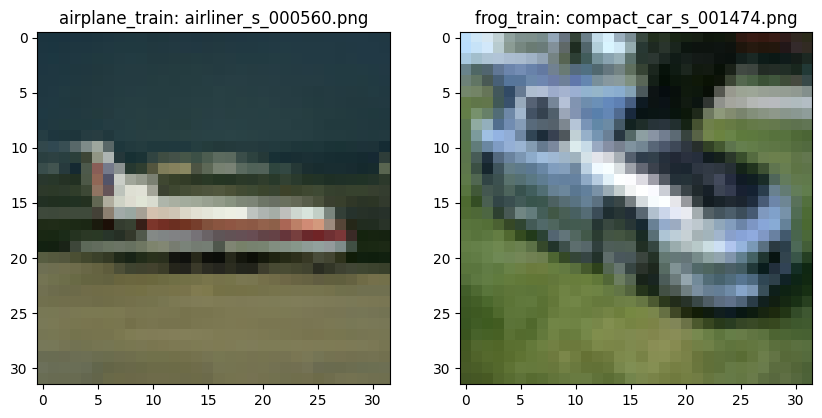

cat_train <> ship_train
Similitud: 0.4678


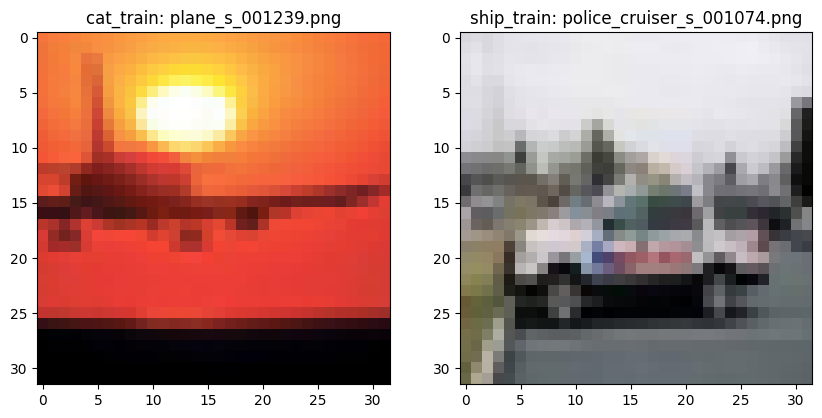

bird_train <> ship_train
Similitud: 0.5028


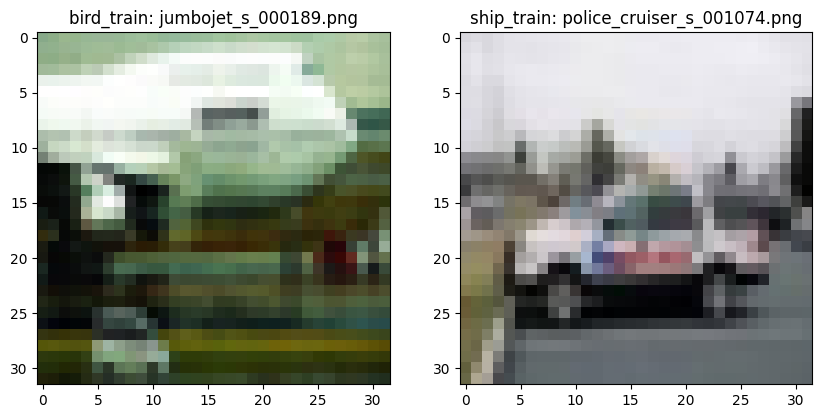

airplane_train <> dog_train
Similitud: 0.5034


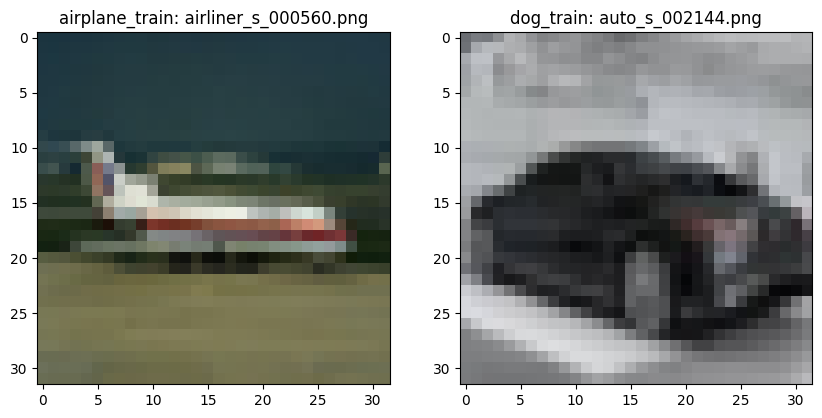

airplane_train <> deer_train
Similitud: 0.5068


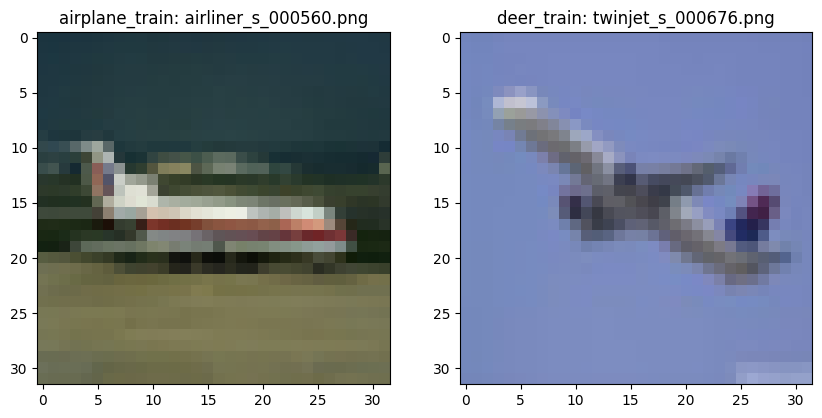

horse_train <> ship_train
Similitud: 0.5154


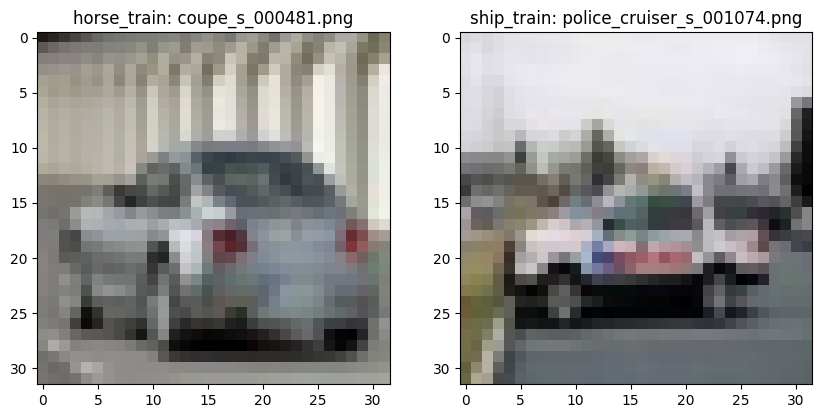

frog_train <> truck_train
Similitud: 0.5216


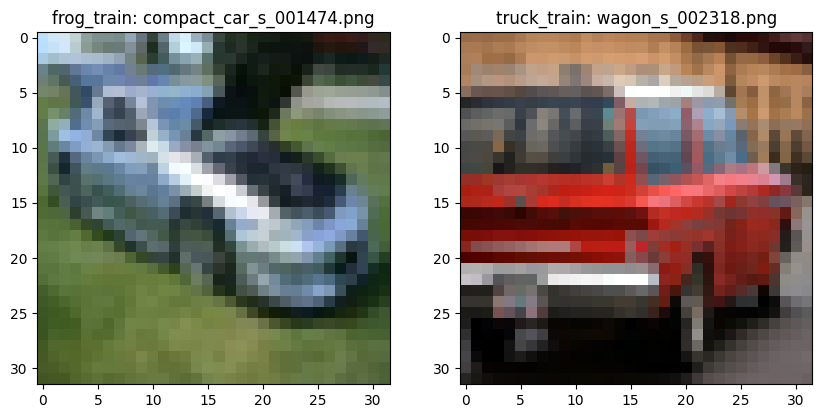

In [ ]:


# Función para visualizar los 10 pares de imágenes menos similares
def show_10_least_similar_images(estimator, class_names, filenames_dict):
    # Obtener la matriz de similitud
    W = estimator.W

    # Ordenar los índices según las similitudes (de menor a mayor)
    least_similar_indices = np.argsort(W, axis=None)
    
    # Generar pares de clases únicos (i, j) donde i < j
    pairs = list(zip(*np.unravel_index(least_similar_indices, W.shape)))
    unique_pairs = [(clase_i, clase_j) for clase_i, clase_j in pairs if clase_i < clase_j]
    
    # Limitar a los primeros 10 pares
    top_10_least_similar_pairs = unique_pairs[:10]

    print("Muestras menos similares entre las clases pares:")
    
    for (clase_i, clase_j) in top_10_least_similar_pairs:
        value = W[clase_i, clase_j]
        print(f"{class_names[clase_i]} <> {class_names[clase_j]}")
        print(f"Similitud: {value:.4f}")
        
        # Obtener las imágenes correspondientes a los pares menos similares
        source_files = [filenames_dict[i] for i in estimator.class_indices[clase_i]]
        target_files = [filenames_dict[i] for i in estimator.class_indices[clase_j]]
        
        # Visualizar una imagen de cada clase para los pares menos similares
        for source_filename, target_filename in zip(source_files[:1], target_files[:1]):
            img_source = plt.imread(source_filename)
            img_target = plt.imread(target_filename)
            
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(img_source)
            axs[0].set_title(f"{class_names[clase_i]}: {source_filename.name}")
            axs[1].imshow(img_target)
            axs[1].set_title(f"{class_names[clase_j]}: {target_filename.name}")
            plt.show()

# Llamar a la función
show_10_least_similar_images(estimator, class_names_train, filenames_dict)



# Obtener los nombres de archivos de todo el dataset

In [ ]:
# Aca se obtiene el nombre de los archivos en train o test dependiendo de lo que se va a evaluar

# Obtener todos los nombres de archivo en train
filenames_total = [str(f) for f in directorio_dataset.glob('*/*.png')]

# Crear un mapeo de índices a nombres de archivo en train (solo el nombre de archivo, sin la ruta)
filenames_dict_total = {i: f for i, f in enumerate(directorio_dataset.glob('*/*.png'))}

# 3. Visualizar las muestras (par de imagenes) menos similares entre todo el dataset

	Nombre del archivo: stealth_fighter_s_000436.png, Similitud: 0.0294
	Nombre del archivo: monoplane_s_001543.png, Similitud: 0.0294


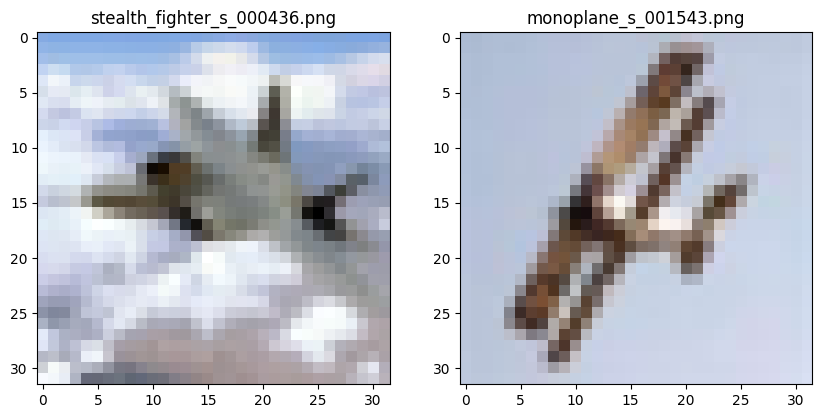

	Nombre del archivo: compact_car_s_000306.png, Similitud: 0.0479
	Nombre del archivo: stealth_bomber_s_002294.png, Similitud: 0.0479


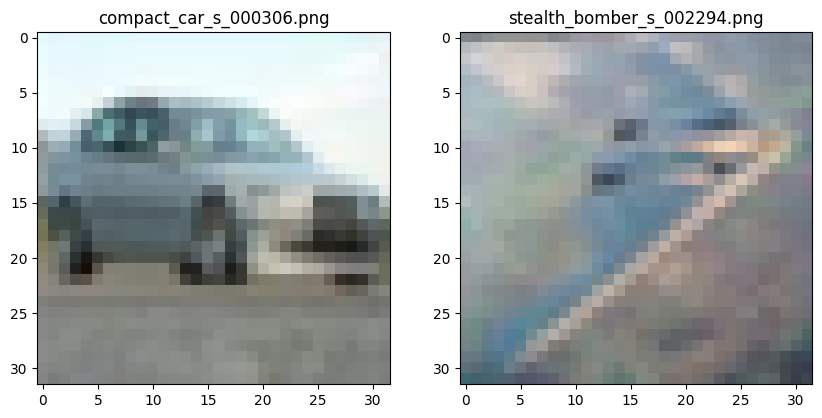

	Nombre del archivo: multiengine_airplane_s_000109.png, Similitud: 0.1053
	Nombre del archivo: stealth_bomber_s_002305.png, Similitud: 0.1053


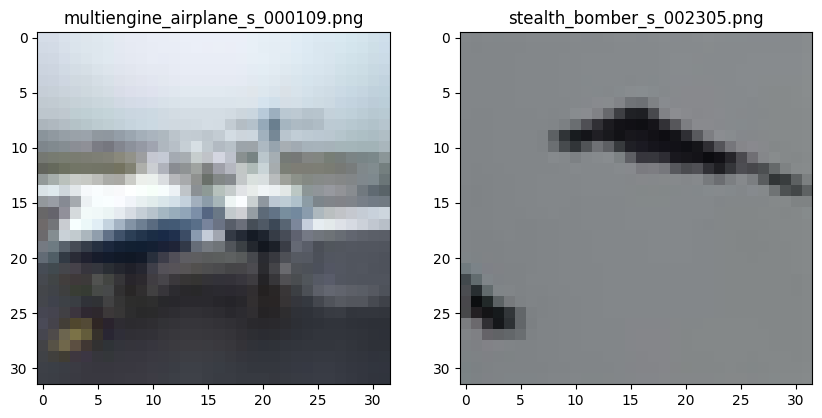

	Nombre del archivo: airplane_s_000048.png, Similitud: 0.1087
	Nombre del archivo: airbus_s_001253.png, Similitud: 0.1087


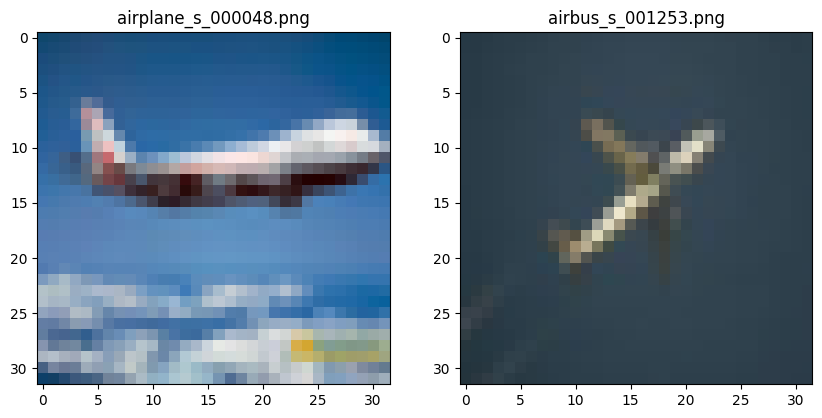

	Nombre del archivo: automobile_s_000972.png, Similitud: 0.1135
	Nombre del archivo: wagon_s_001428.png, Similitud: 0.1135


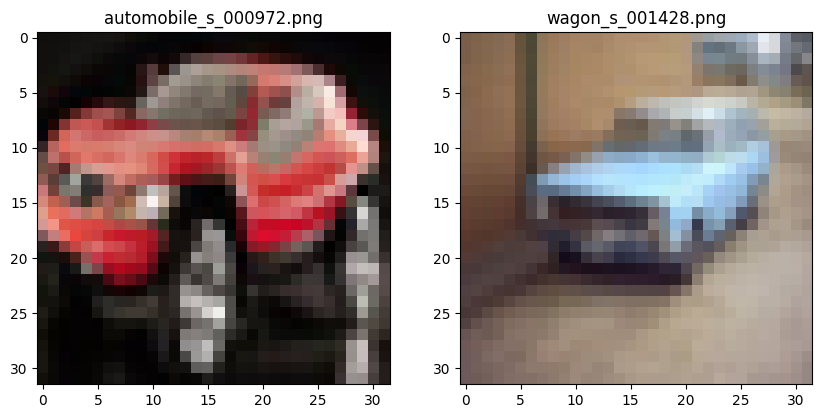

	Nombre del archivo: coupe_s_000336.png, Similitud: 0.1150
	Nombre del archivo: monoplane_s_000350.png, Similitud: 0.1150


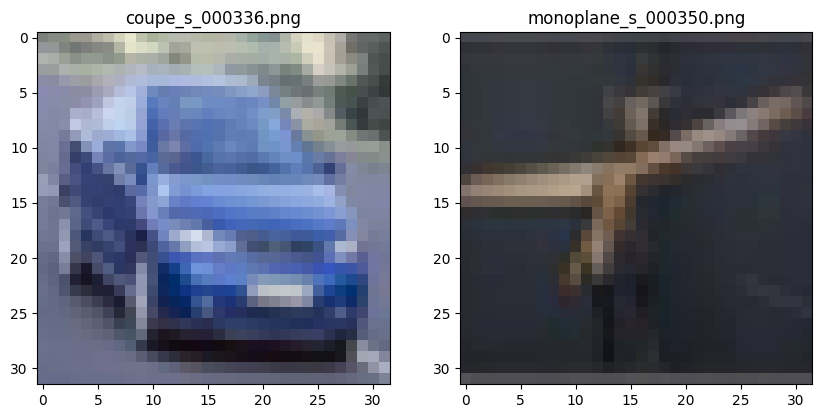

	Nombre del archivo: motorcar_s_002480.png, Similitud: 0.1215
	Nombre del archivo: stealth_bomber_s_002323.png, Similitud: 0.1215


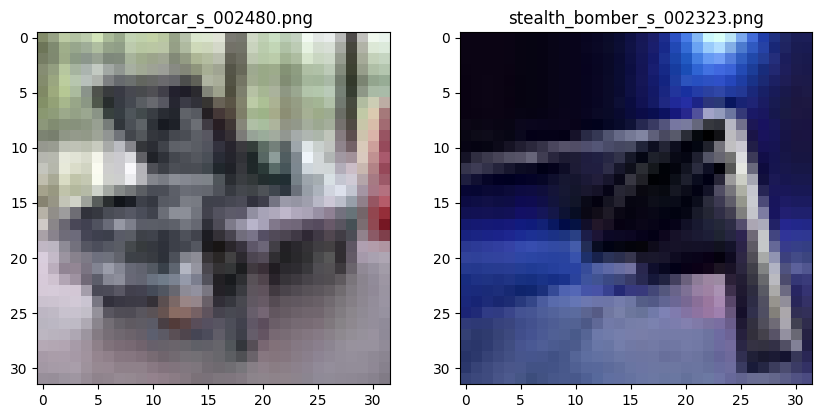

	Nombre del archivo: auto_s_000147.png, Similitud: 0.1233
	Nombre del archivo: plane_s_000015.png, Similitud: 0.1233


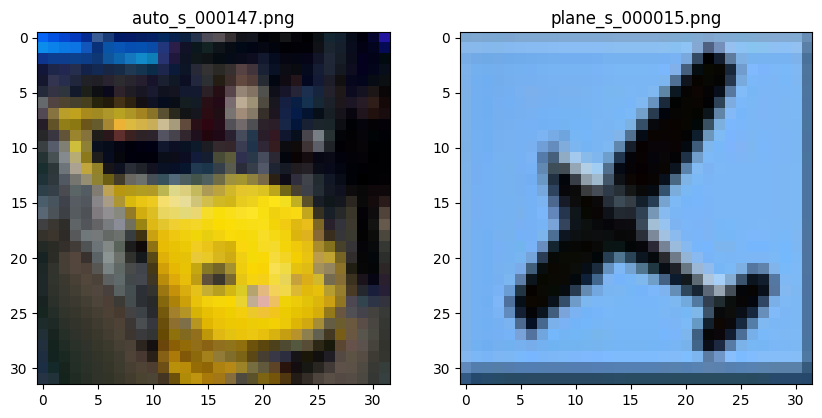

	Nombre del archivo: stealth_bomber_s_002056.png, Similitud: 0.1251
	Nombre del archivo: amphibious_aircraft_s_000449.png, Similitud: 0.1251


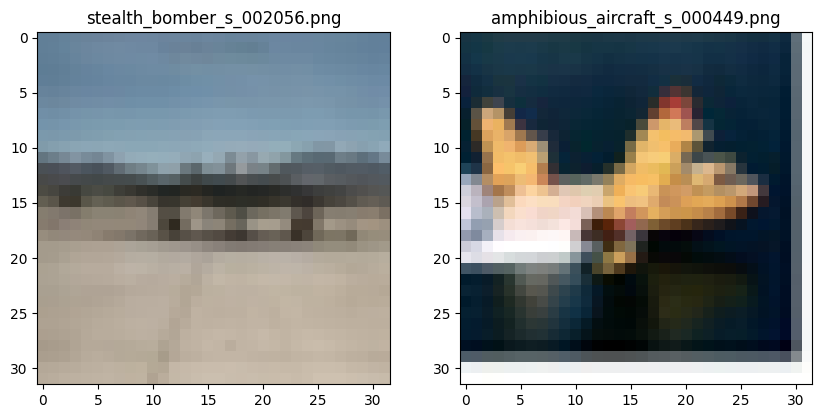

	Nombre del archivo: amphibious_aircraft_s_000036.png, Similitud: 0.1342
	Nombre del archivo: automobile_s_000422.png, Similitud: 0.1342


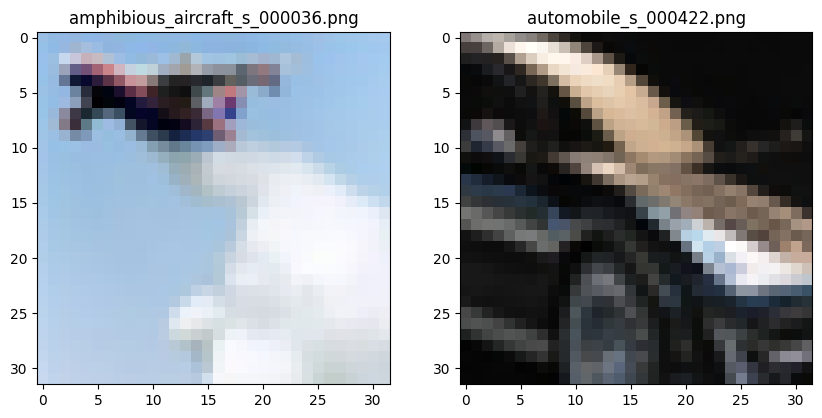

In [ ]:
#Muestras menos similares utilizando la matriz M

# Acceder a la matriz M después de ajustar el modelo
M = estimator.M

# Ordenar los índices según las similitudes (de menor a mayor)
least_similar_indices = np.argsort(M, axis=None)

# Conjunto para llevar un registro de los archivos ya mostrados
shown_files = set()
count = 0
show_samples = 10  # Número de muestras a visualizar

# Mostrar las 10 muestras menos similares
for idx in least_similar_indices:
    if count >= show_samples:
        break

    # Convertir el índice plano a índice 2D
    idx_2d = np.unravel_index(idx, M.shape)

    # Obtener los índices globales de las muestras en el dataset
    source_idx = idx_2d[0]
    target_idx = idx_2d[1]

    # Verificar que los índices estén dentro de los límites del dataset
    if source_idx < len(filenames_dict_total) and target_idx < len(filenames_dict_total):
        source_filename = filenames_dict_total[source_idx]
        target_filename = filenames_dict_total[target_idx]

        # Verificar si las imágenes ya han sido mostradas (en cualquiera de los dos roles)
        if source_filename.name not in shown_files and target_filename.name not in shown_files:
            shown_files.add(source_filename.name)
            shown_files.add(target_filename.name)

            value = M[idx_2d]
            print(f"\tNombre del archivo: {source_filename.name}, Similitud: {value:.4f}")
            print(f"\tNombre del archivo: {target_filename.name}, Similitud: {value:.4f}")
            
            # Visualizar las imágenes de los pares menos similares
            img_source = plt.imread(source_filename)
            img_target = plt.imread(target_filename)
            
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(img_source)
            axs[0].set_title(f"{source_filename.name}")
            axs[1].imshow(img_target)
            axs[1].set_title(f"{target_filename.name}")
            plt.show()

            count += 1